# Predicting Income with Random Forest

In this project, I will be using a dataset containing census information from [UCI’s Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/census+income).
By using this census data with a random forest, I will try to predict whether or not a person makes more than 50,000 Dollar.

In [25]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Data Investigation

In [38]:
income_data = pd.read_csv('income.csv', header = 0, delimiter = ', ')
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
print(income_data.iloc[0])

age                          39
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education-num                13
marital-status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capital-gain               2174
capital-loss                  0
hours-per-week               40
native-country    United-States
income                    <=50K
Name: 0, dtype: object


## Formatting Data for Sci-kit Learn

`Sex` column contains string `Male` and `Female`. The data is mapped as `Male = 0`, `Female = 1`

In [27]:
income_data['sex_int'] = income_data['sex'].apply(lambda x:0 if x == 'Male' else 1)


## Implemeanting Random Forest

At first I considered five relevant features:

- "age", 
- "capital-gain", 
- "capital-loss", 
- "hours-per-week", 
- 'sex_int'

In [28]:
labels = income_data[['income']]

data = income_data[["age", "capital-gain", "capital-loss", "hours-per-week", 'sex_int']]


In [29]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)


In [30]:
forest = RandomForestClassifier(random_state = 1)
forest.fit(train_data, train_labels)
print('Current Model score \nConsidering 5 relevent features: {}'.format(forest.score(test_data, test_labels)))


Current Model score 
Considering 5 relevent features: 0.822815906648242


## Addition of extra relevant features

In [31]:
print(income_data['native-country'].value_counts())

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [32]:
income_data['country_int'] = income_data['native-country'].apply(lambda x:0 if x == 'United-States' else 1)

In [33]:
labels = income_data[['income']]

data = income_data[["age", "capital-gain", "capital-loss", "hours-per-week", 'sex_int', 'country_int']]

In [34]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)


## Selection of Decision Tree Counts for high score 

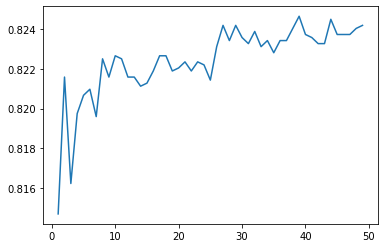

In [17]:
score = []
for i in range(1,50):
    forest = RandomForestClassifier(n_estimators = i, random_state = 1)
    forest.fit(train_data, train_labels)
    score.append(forest.score(test_data, test_labels))
    
plt.plot(range(1,50), score)
plt.show()

## Random Forest with ***38*** Trees

In [37]:
forest = RandomForestClassifier(n_estimators = 38, random_state = 1)
forest.fit(train_data, train_labels)
print('Current Model score \nConsidering 6 relevent features\nand 38 Decision Trees : {}'.format(forest.score(test_data, test_labels)))  

Current Model score 
Considering 6 relevent features
and 38 Decision Trees : 0.8240442192538001


In [24]:
# Relevant Feature Importance

print(forest.feature_importances_)


[0.30511643 0.29881027 0.11658643 0.20597344 0.06491152 0.0086019 ]
